In [55]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


# For better visualization
sns.set(style='whitegrid')
plt.style.use('ggplot')
%matplotlib inline


In [3]:
#Load dataset
data = pd.read_csv('datasets/bank-full.csv')

data.head()

#Checking the shape of the data
#data.shape

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscription
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Exploratory Data Analysis

In [4]:
# Missing and duplicated values

print(data.info())
print("\nMissing values per column:")
print( data.isnull().sum())

print("\nDuplicated rows:", data.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           45211 non-null  int64 
 1   job           45211 non-null  object
 2   marital       45211 non-null  object
 3   education     45211 non-null  object
 4   default       45211 non-null  object
 5   balance       45211 non-null  int64 
 6   housing       45211 non-null  object
 7   loan          45211 non-null  object
 8   contact       45211 non-null  object
 9   day           45211 non-null  int64 
 10  month         45211 non-null  object
 11  duration      45211 non-null  int64 
 12  campaign      45211 non-null  int64 
 13  pdays         45211 non-null  int64 
 14  previous      45211 non-null  int64 
 15  poutcome      45211 non-null  object
 16  subscription  45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None

Missing values per column:
age      

There are no null values
And there are no duplicated values

### Numerical Features Analysis


In [6]:
# Numeric feature summary


numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
data[numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


#### Visualization of the numeric varic variables

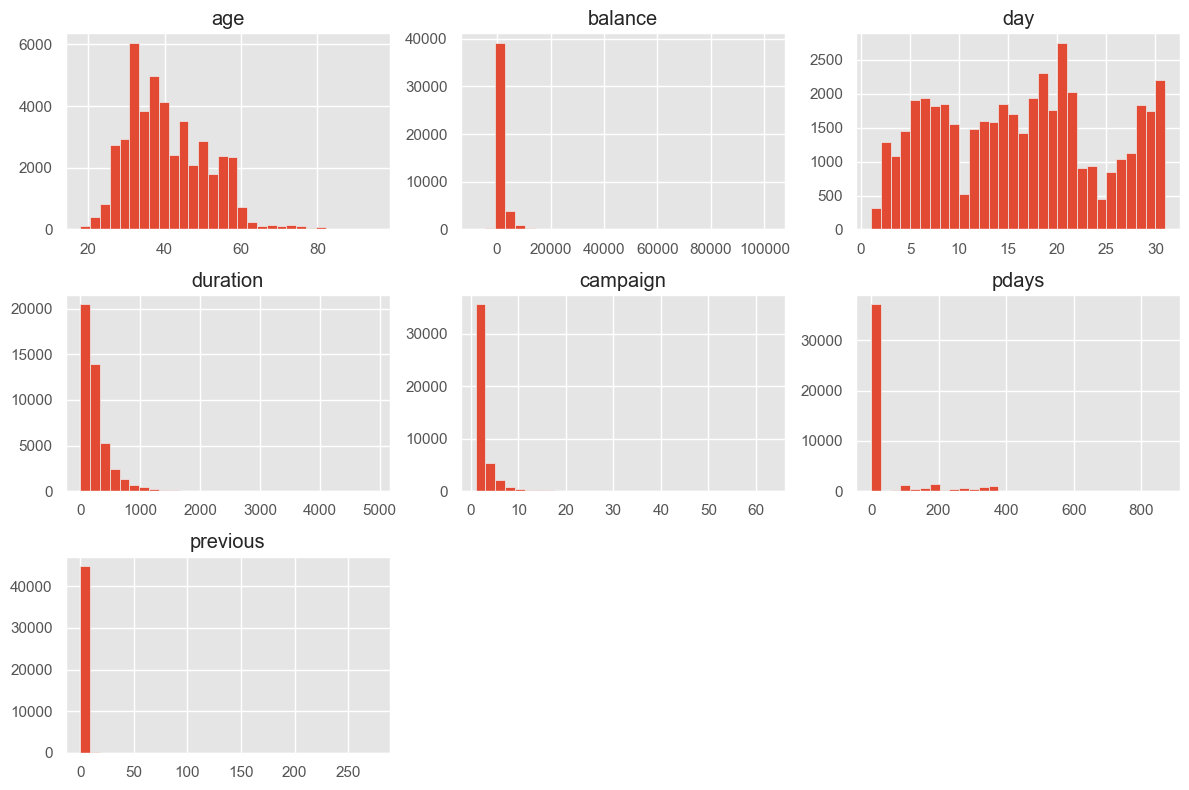

In [71]:
# Histograms

data[numeric_cols].hist(bins=30, figsize=(12, 8))
plt.tight_layout()
plt.show()



1. Age
•	Insight: The majority of customers fall between 30 to 60 years old, peaking around the 35–40 age group.
•	Business Implication: This age range represents economically active adults, likely to be working professionals or those planning for mid- to long-term financial products like savings accounts, loans, or investment products.
•	Recommendation: Focus marketing strategies and personalized offerings on this age bracket. Consider segmenting further by life stage (e.g., first-time home buyers vs. retirement planners).

2. Balance
•	Insight: Most account balances cluster very close to zero, but a few have extremely high balances (long right tail).
•	Business Implication: This shows income inequality or diverse financial statuses within the customer base.
•	Recommendation: Tailor campaigns—offer basic or support-level services to low-balance customers (e.g., fee waivers, educational content), and premium banking products or wealth management services to high-balance clients.

3. Day (of the month the contact was made)
•	Insight: Customer contacts are spread throughout the month, but there's a notable increase in contacts between days 20–30.
•	Business Implication: Contacting customers later in the month might be more productive or aligned with salary payment schedules.
•	Recommendation: Align future outbound marketing efforts around the third and fourth weeks of the month. Test performance of mid-month vs. end-month outreach.

4. Duration (of last contact in seconds)
•	Insight: Most call durations are very short (under 500 seconds or ~8 minutes).
•	Business Implication: Shorter calls may indicate disinterest or quick conversions, but could also suggest ineffective communication.
•	Recommendation: Dig deeper—analyze conversion rates by call duration. Train agents for more effective conversations within shorter durations.

5. Campaign (number of contacts performed during this campaign)
•	Insight: The majority of customers were contacted only once or twice, with diminishing returns on more contacts.
•	Business Implication: High frequency may lead to fatigue or disengagement. Beyond a few touchpoints, effectiveness seems to drop.
•	Recommendation: Optimize campaigns to a maximum of 3 contact attempts. If no engagement occurs by then, move the customer to a long-term nurture funnel.

6. Pdays (number of days since client was last contacted)
•	Insight: A large spike at pdays = 999, indicating these clients were never contacted before. Others are mostly below 300.
•	Business Implication: Most outreach is to new or dormant customers.
•	Recommendation: Segment messaging for first-time contacts vs. previously engaged clients. Prioritize clients not contacted in a long time for reactivation campaigns.


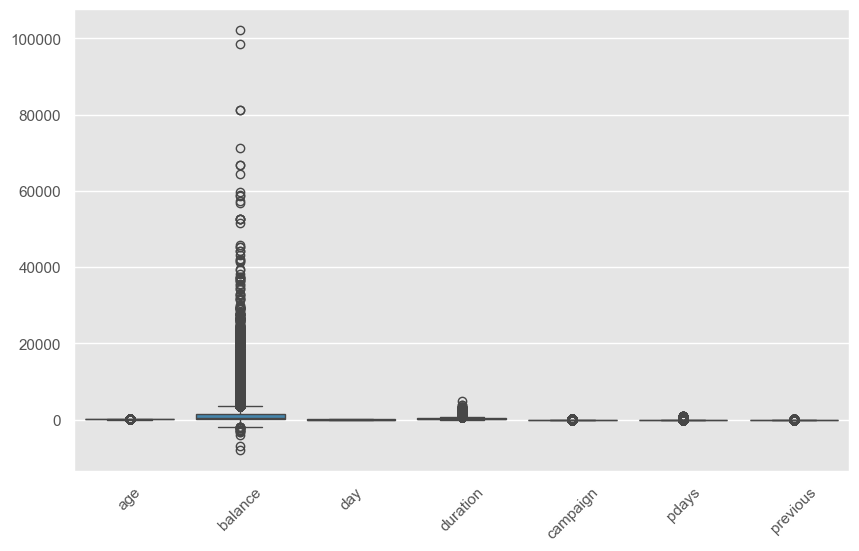

In [72]:
# Boxplots (outlier detection)
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[numeric_cols])
plt.xticks(rotation=45)
plt.show()


The boxplot shows the distribution of numeric features in the dataset. Key insights include:

Balance has a wide range with extreme outliers, indicating significant variability and potential skewness.
Day and Campaign show moderate spread with some outliers, suggesting occasional high contact days or campaign intensities.
Duration has a tight interquartile range (IQR) but a long tail, with most calls being short and a few extending significantly.
Pdays and Previous are heavily skewed, with most values near zero and a few high outliers, reflecting rare prior contacts.
Age is relatively evenly distributed with minimal outliers.

#### Categorical features anaysis

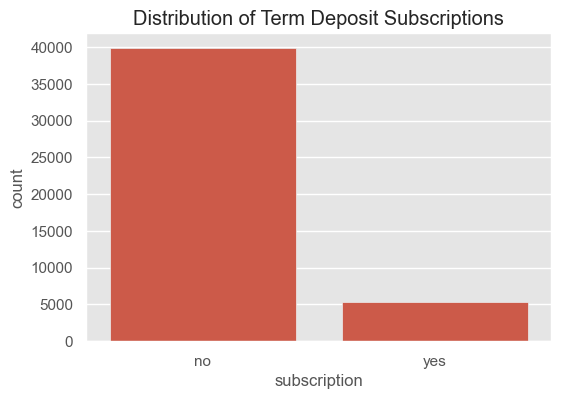

Subscription rate: 
subscription
no     88.30152
yes    11.69848
Name: proportion, dtype: float64

Most people (about 88.30%) didn’t subscribe to the term deposit offer, while only 11.70% said yes. This shows that the offer wasn’t very convincing for most users, 
and we may need to explore why people weren’t interested or how to better target the right audience."



In [9]:
#Distribution of Subscription
plt.figure(figsize=(6,4))
sns.countplot(x="subscription", data=data)
plt.title("Distribution of Term Deposit Subscriptions")
plt.show()

# Subscription rate
subscription_rate = data["subscription"].value_counts(normalize=True) * 100
print(f"Subscription rate: \n{subscription_rate}")

print("""
Most people (about 88.30%) didn’t subscribe to the term deposit offer, while only 11.70% said yes. This shows that the offer wasn’t very convincing for most users, 
and we may need to explore why people weren’t interested or how to better target the right audience."
""")

In [ ]:
# Categorical Feature Summary 


categorical_cols = data.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('subscription')  # I have already checked that.

for col in categorical_cols:
    print(f"\n---- {col.upper()} ----")
    print(data[col].value_counts(normalize=True) * 100)



---- JOB ----
job
blue-collar      21.525735
management       20.919688
technician       16.803433
admin.           11.437482
services          9.188029
retired           5.007631
self-employed     3.492513
entrepreneur      3.289023
unemployed        2.882042
housemaid         2.742695
student           2.074716
unknown           0.637013
Name: proportion, dtype: float64

---- MARITAL ----
marital
married     60.193316
single      28.289576
divorced    11.517109
Name: proportion, dtype: float64

---- EDUCATION ----
education
secondary    51.319369
tertiary     29.419831
primary      15.153392
unknown       4.107407
Name: proportion, dtype: float64

---- DEFAULT ----
default
no     98.197341
yes     1.802659
Name: proportion, dtype: float64

---- HOUSING ----
housing
yes    55.583818
no     44.416182
Name: proportion, dtype: float64

---- LOAN ----
loan
no     83.977351
yes    16.022649
Name: proportion, dtype: float64

---- CONTACT ----
contact
cellular     64.774059
unknown      28.

Customer Profile Insights
(% values show representation in your dataset)

1. Employment Status (JOB)

Blue-collar (21.5%) and management (20.9%) dominate your outreach

Students (2.1%) and retirees (5%) are underrepresented


2. Financial Background

98.2% have no credit default → Low-risk portfolio

44% have no housing loan → Likely more disposable income


3. Contact Patterns

65% reached via cellular (but check conversion rates by channel)

May–Aug = Peak campaign months (71% of contacts)


4. Campaign History

81.7% of outcomes unknown → Major data gap

Only 3.3% of contacts led to past success


#### Categorical features and their subscription rates

In [13]:
categorical_cols = data.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('subscription')  # We'll analyze this separately

for col in categorical_cols:
    print(f"\n---- {col.upper()} ----")
    
    # Calculate percentages for each category split by y
    cross_tab = pd.crosstab(data[col], data['subscription'], normalize='index') * 100
    cross_tab = cross_tab.rename(columns={'no': 'No (%)', 'yes': 'Yes (%)'})
    
    # Add count of each category
    count_tab = data[col].value_counts().rename('Count')
    
    # Combine count and percentage info
    result = pd.concat([count_tab, cross_tab], axis=1)
    print(result.sort_values(by='Yes (%)', ascending=False))



---- JOB ----
               Count     No (%)    Yes (%)
job                                       
student          938  71.321962  28.678038
retired         2264  77.208481  22.791519
unemployed      1303  84.497314  15.502686
management      9458  86.244449  13.755551
admin.          5171  87.797331  12.202669
self-employed   1579  88.157061  11.842939
unknown          288  88.194444  11.805556
technician      7597  88.943004  11.056996
services        4154  91.116996   8.883004
housemaid       1240  91.209677   8.790323
entrepreneur    1487  91.728312   8.271688
blue-collar     9732  92.725031   7.274969

---- MARITAL ----
          Count     No (%)    Yes (%)
marital                              
single    12790  85.050821  14.949179
divorced   5207  88.054542  11.945458
married   27214  89.876534  10.123466

---- EDUCATION ----
           Count     No (%)    Yes (%)
education                             
tertiary   13301  84.993610  15.006390
unknown     1857  86.429725  13.5702



### **General Subscription Overview**

* **Yes**: 11.70% — **Subscribed**
* **No**: 88.30% — **Did Not Subscribe**

 **Insight**: The subscription rate is quite low. Targeted marketing strategies are needed to improve conversion rates.



###  **Job Distribution & Subscription**

* **Students and retirees** have the highest subscription rates — possibly due to having more time or interest in investment opportunities.
* **Blue-collar workers**, despite being the largest group, have **the lowest** conversion rate.


###  **Marital Status & Subscription**

* **Singles** are more likely to subscribe — campaigns targeting young professionals could be more effective.


###  **Education & Subscription**


* People with **higher education (tertiary)** are more likely to subscribe.
  Tailor ads with more financial jargon or detailed product benefits for this group.


### **Housing Loan & Subscription**


* Individuals without housing loans are more likely to subscribe — they may have more disposable income.


### **Personal Loan & Subscription**

* As expected, people without loans are more open to new investments or offers.


###  **Contact Type & Subscription**

* **Cellular contact** performs best — prioritize this method.
* People contacted through **unknown means** almost never subscribed.


###  **Month & Subscription**


* **Spring and late-year months** yield higher conversions.
* **May**, despite being the most used month (30%), has **the lowest success rate**.


### Summary of Actionable Insights

* Focus more on **retired, students, and tertiary-educated individuals**.
* Use **cellular contact**, avoid unknown channels.
* Explore **seasonality** — **March to October** sees more conversions.
* Segment audiences **without loans/housing debts** for better targeting.
* Analyze why **May** underperforms despite high outreach volume.


### Job vs Subscription Rate

<Figure size 2000x600 with 0 Axes>

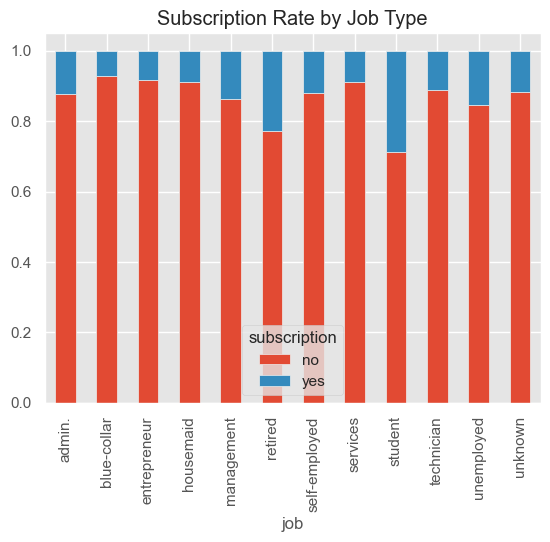

In [74]:
plt.figure(figsize=(20, 6))
job_subscription = data.groupby("job")["subscription"].value_counts(normalize=True).unstack()
job_subscription.plot(kind="bar", stacked=True)
plt.title("Subscription Rate by Job Type")
plt.show()




From the chart, we can see how different job categories responded to the subscription offer:

Students and retirees had the highest subscription rates, suggesting they were more likely to say "yes" to the term deposit offer. This might be due to a stronger interest in saving or having fewer financial obligations.

Blue-collar workers, housemaids, and self-employed individuals showed lower subscription rates, indicating possible financial constraints, lower trust, or less interest in long-term savings.

Jobs like admin, technician, and management fall somewhere in the middle but still lean heavily toward "no."


### Education Impact

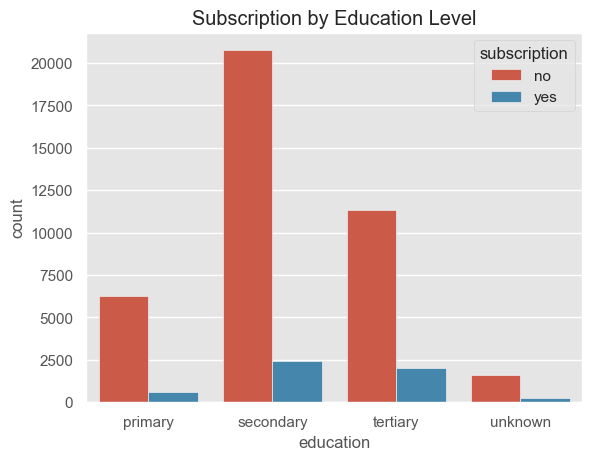

In [73]:
education_order = ["primary", "secondary", "tertiary", "unknown"]
sns.countplot(x="education", hue="subscription", data=data, order=education_order)
plt.title("Subscription by Education Level")
plt.show()




The chart shows the number of users who accepted (yes) or declined (no) the subscription offer based on their level of education:

Individuals with secondary education form the largest group, but the majority of them did not subscribe. This group had the highest rejection count overall.

Those with tertiary (higher) education showed a relatively higher acceptance rate compared to the other groups, suggesting education level may positively influence decision-making regarding financial products.

People with primary education or unknown education level were least likely to subscribe, both in count and rate.
|

### Previous Campaign Outcome 

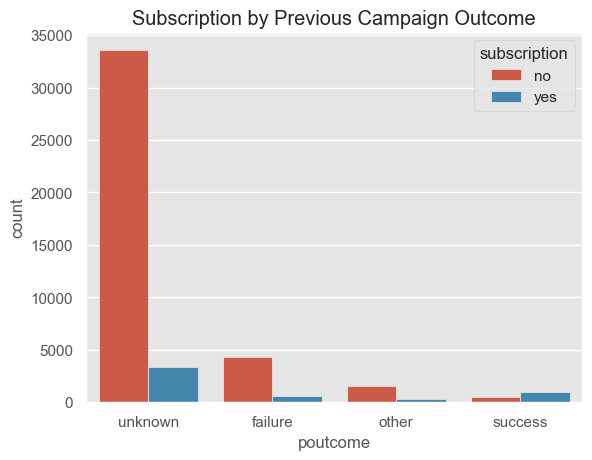

In [70]:
sns.countplot(x="poutcome", hue="subscription", data=data)
plt.title("Subscription by Previous Campaign Outcome")
plt.show()



Looking at the graph, it's clear that most people we're looking at have an "unknown" history with our past campaigns, and these folks usually don't subscribe.

But here's the really interesting bit: for the small group of people who had a "successful" interaction with us before, they're much more likely to subscribe this time. That's a big deal!

On the flip side, if someone's past campaign outcome was a "failure" or "other," they pretty much act like the "unknown" group – meaning, they're still not very likely to subscribe.

Overall, it's tough to get people to subscribe in general; there are way more "no's" than "yes's" across the board.

So, the big takeaway is: Those who've had a "success" with us before are golden – we should really focus on them. For everyone else, especially the huge "unknown" crowd, we need to think up completely different ways to get them interested.


### Monthly Trends

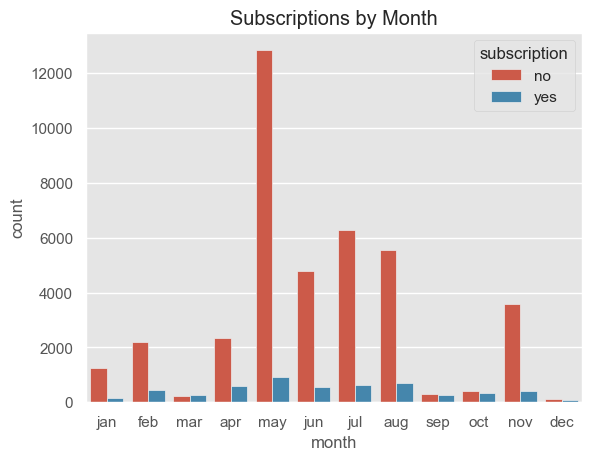


This chart highlights a clear seasonal pattern in campaign activity, particularly a significant peak in outreach during the months of May, July, and August. However, 
despite this increased effort, these busy periods are predominantly characterized by individuals choosing not to subscribe, with the orange "no" bars consistently 
towering over the blue "yes" bars.

Overall, the graph starkly illustrates that securing a subscription is a challenging endeavor across the entire year. In every single month, the number of rejections 
far outweighs the successful subscriptions, indicating a persistent difficulty in converting leads regardless of the timing of the marketing campaign.



In [20]:
month_order = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]
sns.countplot(x="month", hue="subscription", data=data, order=month_order)
plt.title("Subscriptions by Month")
plt.show()

print("""
This chart highlights a clear seasonal pattern in campaign activity, particularly a significant peak in outreach during the months of May, July, and August. However, 
despite this increased effort, these busy periods are predominantly characterized by individuals choosing not to subscribe, with the orange "no" bars consistently 
towering over the blue "yes" bars.

Overall, the graph starkly illustrates that securing a subscription is a challenging endeavor across the entire year. In every single month, the number of rejections 
far outweighs the successful subscriptions, indicating a persistent difficulty in converting leads regardless of the timing of the marketing campaign.
""")

### Correlation Analysis

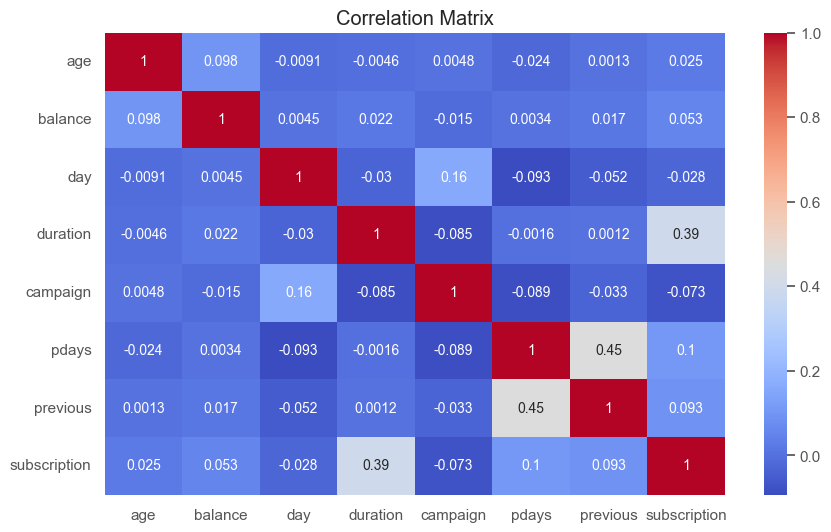

In [75]:
# Encode target for correlation
df_numeric = data.copy()
df_numeric["subscription"] = df_numeric["subscription"].map({"no": 0, "yes": 1})

# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric[numeric_cols + ["subscription"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()




Call Duration is a Big Deal for Subscriptions: The strongest positive connection with subscribing (subscription) is with duration (how long the call lasted, with a correlation of 0.39). 
This makes a lot of sense: if you can keep someone on the phone longer, they're much more likely to say "yes" to subscribing.
      
Warning: Likely a data leakage issue since call duration is only known after the call.

More Contacts in the Current Campaign Might Annoy People: Interestingly, the more times someone was contacted in this current campaign (correlation -0.073), 
the slightly less likely they are to subscribe. This might suggest that too many calls or messages in a short period can backfire.

Past Contact History Has a Tiny Influence: Whether someone had previous contacts (correlation 0.093) or the pdays (days since their last contact, 
correlation 0.1) has a very small positive link to subscribing. It's there, but not nearly as strong as call duration. We also see that pdays and previous 
are moderately related (0.45), which is logical as both relate to past interaction history.

Age, Bank Balance, and Day of the Month Don't Seem to Matter for Subscriptions: Things like a person's age, their bank balance, or the specific day of the 
month the call happened have almost no connection to whether they subscribe (y values near zero). This means we probably don't need to worry much about these 
factors when predicting subscriptions.

In short, the length of the conversation is key to getting a subscription. Other factors from past interactions have minor roles, but demographic info like
age or balance don't seem to play a part.


#### Call Duration Distribution by Subscription Status

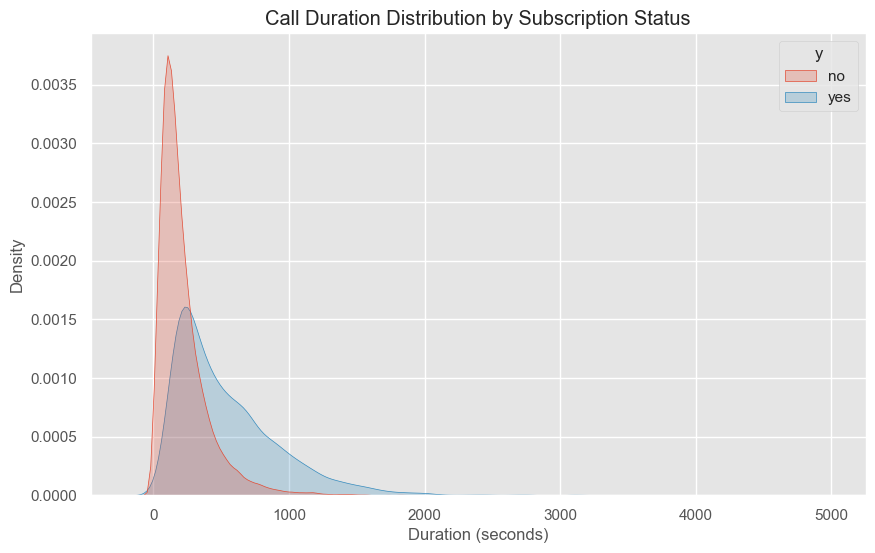

       count        mean         std  min    25%    50%    75%     max
y                                                                     
no   39922.0  221.182806  207.383237  0.0   95.0  164.0  279.0  4918.0
yes   5289.0  537.294574  392.525262  8.0  244.0  426.0  725.0  3881.0


In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot duration distributions by subscription status
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x="duration", hue="y", fill=True, common_norm=False)
plt.title("Call Duration Distribution by Subscription Status")
plt.xlabel("Duration (seconds)")
plt.show()

# Summary statistics
print(data.groupby("y")["duration"].describe())

The "Call Duration Distribution by Subscription Status" chart reveals that conversion rates peak for calls lasting 100-1000 seconds, while very short calls (<100 seconds) rarely succeed. Stakeholders should prioritize training agents to extend call durations to this range and minimize brief, unproductive calls to boost subscription rates.

##### Temporal Analysis

In [ ]:



# Convert 'yes' to 1 and 'no' to 0
data['subscription_binary'] = data['subscription'].map({'yes': 1, 'no': 0})

# Crosstab of conversion rates by month and day
pd.crosstab(
    data['month'],
    data['day'],
    values=data['subscription_binary'],
    aggfunc='mean'

).style.background_gradient(cmap='YlGnBu')



day,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
apr,0.276596,0.120000,0.080645,nan,0.631579,0.208333,0.071429,0.254545,0.151163,nan,nan,0.260870,0.282051,0.268817,0.250000,0.105634,0.062395,nan,0.444444,0.082019,0.642857,0.500000,0.536585,0.400000,nan,0.421053,0.358974,0.315789,0.533333,0.467692,nan
aug,0.000000,0.240000,0.750000,0.165217,0.225410,0.150820,0.116147,0.064024,0.153846,0.382353,0.126829,0.175904,0.158640,0.114907,nan,0.400000,0.264706,0.102649,0.060519,0.080386,0.098182,0.044643,0.000000,0.176471,0.068259,0.061151,0.067376,0.039267,0.007752,0.000000,0.405405
dec,nan,0.800000,0.615385,0.444444,0.000000,nan,0.269231,0.000000,0.550000,0.571429,0.500000,0.000000,0.000000,0.222222,0.666667,0.666667,0.428571,0.444444,nan,nan,0.538462,0.714286,0.333333,0.285714,nan,nan,0.000000,0.562500,0.538462,0.250000,0.000000
feb,0.333333,0.073501,0.122093,0.097192,0.074661,0.066390,nan,0.454545,0.127358,0.564103,0.638298,0.700000,0.526316,nan,0.727273,0.600000,0.689655,0.694444,0.555556,nan,0.000000,0.266667,0.666667,0.347826,0.533333,0.416667,0.472222,nan,nan,nan,nan
jan,nan,nan,nan,nan,nan,0.000000,0.250000,0.400000,nan,nan,0.583333,0.590909,0.500000,0.565217,0.500000,nan,nan,0.400000,nan,nan,nan,0.000000,nan,nan,0.333333,0.272727,0.500000,0.071429,0.037906,0.048387,nan
jul,0.136986,0.337838,0.148515,0.043956,0.285714,0.444444,0.097686,0.110000,0.071633,0.078864,0.057416,0.400000,0.652174,0.073090,0.123134,0.129412,0.072917,0.104247,0.900000,0.333333,0.066845,0.073394,0.084795,0.058442,0.076412,0.368421,0.352941,0.086614,0.064865,0.088020,0.036207
jun,0.367925,0.115460,0.107221,0.145015,0.127907,0.042714,0.200000,0.413793,0.074928,0.000000,0.056769,0.071770,1.000000,0.619048,0.391304,0.069182,0.056338,0.078498,0.060811,0.041118,1.000000,0.320000,0.281250,0.117647,0.121951,0.065217,0.038462,0.611111,0.500000,0.183333,nan
mar,0.000000,0.520833,0.689655,0.533333,0.488372,0.833333,nan,0.571429,0.818182,0.481481,0.434783,0.666667,0.500000,nan,0.388889,0.363636,0.473684,0.666667,0.666667,0.000000,nan,0.777778,0.615385,0.416667,0.600000,0.260870,0.545455,nan,0.285714,0.375000,0.428571
may,nan,nan,nan,0.273859,0.045455,0.052439,0.049383,0.040428,0.027972,0.166667,0.040512,0.074401,0.084830,0.071217,0.074600,0.056266,0.461538,0.097331,0.035088,0.045802,0.053571,0.310811,0.027586,0.666667,0.376238,0.083478,0.063574,0.040516,0.036199,0.061224,0.142857



Color Gradient = intensity of subscription rate

Darker blue = higher subscription rate (closer to 1.0)

Lighter colors / white = lower subscription rate

Black (NaN) = no data for that month-day combination


#### *Conversion Rates by Call Duration Groups*

C:\Users\GREJOY\AppData\Local\Temp\ipykernel_19664\637296917.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ax = data.groupby('duration_group')['subscription_binary'].mean().plot(kind='bar')


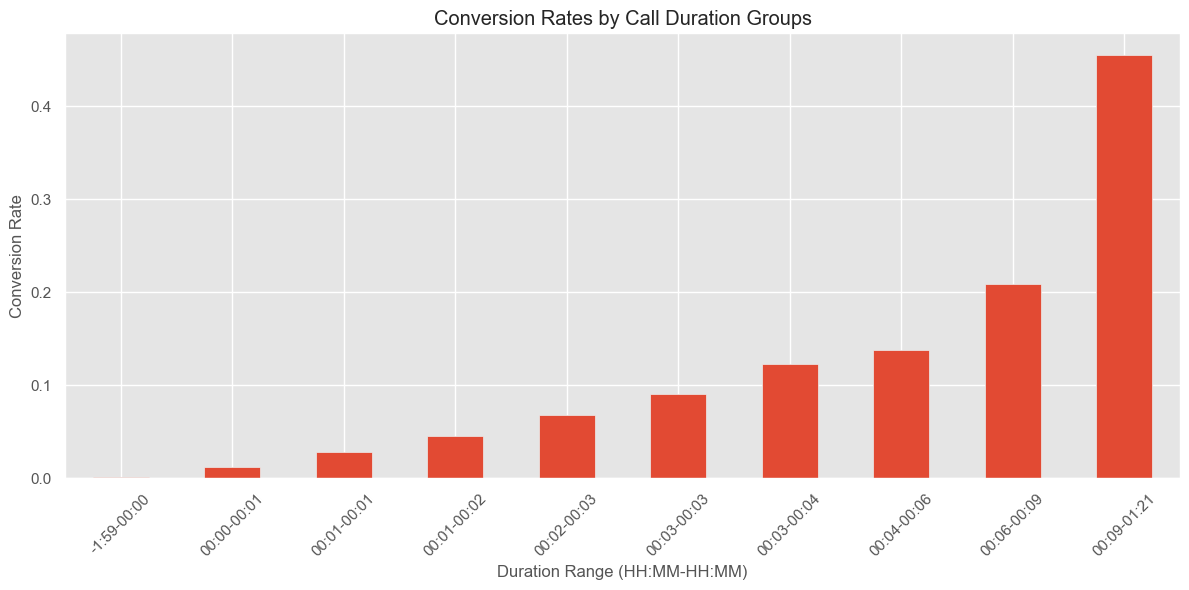

In [54]:


# Create 10 quantile groups with formatted labels
duration_bins = pd.qcut(data['duration'], q=10)
bin_labels = [
    f"{int(b.left//3600):02d}:{int((b.left%3600)//60):02d}-{int(b.right//3600):02d}:{int((b.right%3600)//60):02d}" 
    for b in duration_bins.cat.categories
]

data['duration_group'] = pd.qcut(data['duration'], q=10, labels=bin_labels)

# Plot with formatted labels
plt.figure(figsize=(12,6))
ax = data.groupby('duration_group')['subscription_binary'].mean().plot(kind='bar')
ax.set_xlabel("Duration Range (HH:MM-HH:MM)")
ax.set_ylabel("Conversion Rate")
plt.xticks(rotation=45)
plt.title("Conversion Rates by Call Duration Groups")
plt.tight_layout()




The bar chart "Conversion Rates by Call Duration Groups" shows a clear trend: conversion rates increase significantly with call duration. 
Calls lasting less than 1 minute (e.g., -1:59 to 00:01) have near-zero conversion rates, while those exceeding 6 minutes (e.g., 00:06:00 to 00:09:21) 
achieve the highest rates, peaking above 0.4. This suggests that longer, more engaged conversations are critical for successful term deposit subscriptions,
likely due to better client understanding or trust-building. For marketing, prioritize strategies that extend call durations, such as improved agent 
training or targeted follow-ups, while minimizing short, unproductive calls.


####  Campaign Fatigue Analysis

C:\Users\GREJOY\AppData\Local\Temp\ipykernel_19664\2958899023.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('attempt_group')['subscription_binary'].mean().plot(kind='bar')


<Axes: xlabel='attempt_group'>

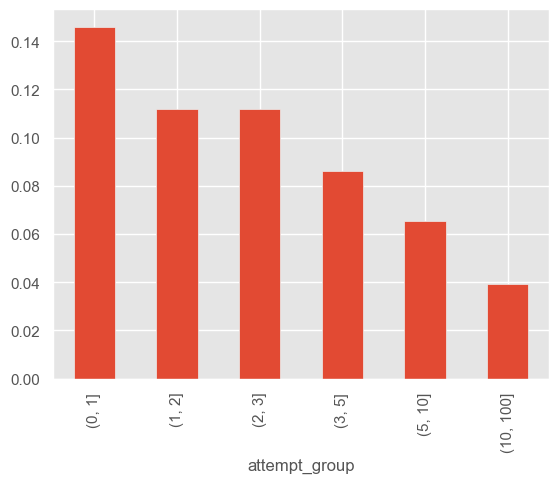

In [53]:
data['attempt_group'] = pd.cut(data['campaign'], bins=[0,1,2,3,5,10,100])
data.groupby('attempt_group')['subscription_binary'].mean().plot(kind='bar')

The data suggests an optimal range of 0-3 campaign attempts yields the highest conversion rates (~0.12-0.14), with a sharp decline beyond 5 attempts. This indicates that initial or limited outreach is most effective, while excessive contacts (10+) lead to diminishing returns, likely due to client fatigue. For marketing, focus on targeting clients within 0-3 attempts, prioritizing first-time outreach, and avoiding over-contacting to maximize subscription rates.

#### Pday Behavior

In [61]:
data['recontact'] = np.where(data['pdays']==-1, 'New', 'Returning')
data.groupby('recontact')['subscription_binary'].mean()

recontact
New          0.091573
Returning    0.230713
Name: subscription_binary, dtype: float64

Returning clients (those who were previously contacted) have a much higher subscription rate (23.1%) compared to new clients (9.2%).
